# 2017 Tax Assesed Home Value Prediction Models

# Project Overview:
This project has been tasked with collecting, cleaning and analyzing Zillow data from 2017 in order to improve a previous prediction model that was designed to predict the Tax Assessed Home Value for Single Family Properties based on available realestate data.

# Goals: 
* Predict property tax assessed values of Single Family Properties
* Outperform existing logerror model
* Recommend improvements for a more accurate model
* Define relevant fips codes for our data

# Reproduction of this Data:
* Can be accomplished using a local ```env.py``` containing ```user, password, host``` information for access to the Codeup SQL database server.
* All other step by step instructions can be found by reading the below Jupyter Notebook files located in my [proj-2_zillow](https://github.com/QMCBT-JustinEvans/project-2_zillow.git) github repository.
    * 01_wrangle
    * 02_explore
    * 03_model

# Imports

In [1]:
import matplotlib.pyplot as plt
# Increases Display Resolution for Graphs 
# Only works inside notebook
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

from sklearn.metrics import mean_squared_error

# import Environment and Helper Files
import QMCBT_explore_evaluate as ee
import QMCBT_wrangle as w

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

# Left Align Tables in Jupyter Notebook
from IPython.core.display import HTML
table_css = 'table {align:left;display:block}'
HTML('<style>{}</style>'.format(table_css))

# Acquire

<div class="alert alert-success">

* ```zillow``` data from Codeup SQL database was used for this project.
* The data was initially pulled on 15-NOV-2022.
* The initial DataFrame contained 52,441 records with 69 features  
    (69 columns and 52,441 rows) before cleaning & preparation.
* Each row represents a Single Family Property record with a Tax Asessment date within 2017.
* Each column represents a feature provided by Zillow or an informational element about the Property.
</div>

# Prepare

<div class="alert alert-success">

**Prepare Actions:**

* **Whitespace:** Removed 52,441 Whitespace characters.
* **REFORMAT:** Reformatted 13 columns containing 596,382 NaN entries to 0.
* **CONVERT dtypes:** Convert dtypes to accurately reflect data contained within Feature.
* **FEATURE ENGINEER:** Use Yearbuilt to create Age Feature, Drop yearbuilt for redundancy; create Feature to show ratio of Bathrooms to Bedrooms.
* **fips CONVERSION:** Use fips master list to convert fips to county and state, Drop state for redundancy.
* **PIVOT:** Pivot the resulting county column from fips conversion to 3 catagorical features. 
* **DROP:** Dropped 27 Columns unecessary to data prediction (ie.. index and redundant features).
* **REPLACE:** Replaced conditional values in 2 columns to transform into categorical features.
* **RENAME:** Columns for Human readability.    
* **REORDER:** Rearange order of columns for human readability.   
* **DROP 2:** Drop Location Reference Columns unsuitable for use with ML without categorical translation.
* **CACHE:** Write cleaned DataFrame into a new csv file ('zillow_2017_cleaned.csv').  
* **ENCODED:** No encoding required.
* **MELT:** No melts needed.
</div>

<div class="alert alert-info">

    
# Summary of Data Cleansing
* Cleaning the data resulted in less than 10% overall record loss
</div>

<div class="alert alert-warning">
    
* <b>DROP NaN COLUMNS:</b> 39 features each containing over 30% NaN were dropped; <b>resulting in no record loss</b>.
  
* <b>DROP NaN ROWS:</b> 1,768 records containing NaN across 13 features were dropped; <b>resulting in only 3% record loss</b>.

* <b>OUTLIERS:</b> Aproximately 3,000 outliers were filtered out in an attempt to more accurately align with realistic expectations of a Single Family Residence; <b>resulting in less than a 6% decrease in overall records</b>.

* <b>IMPUTE:</b> No data was imputed</div>

<div class="alert alert-danger"><b>logerror:</b> The original logerreror prediction data was pulled over and prepared with this DataFrame for later comparison in order to meet the requirement of improving the original model.  
    
    
* <b>Note:</b> Special care was taken to ensure that there was no leakage of this data.</div>

In [2]:
# Use function from wrangle file to acquire and prepare zillow data
df = w.wrangle_zillow()

# Split
<div class="alert alert-success">

* **SPLIT:** train, validate and test (approx. 60/20/20), stratifying on target of 'churn'
* **SCALED:** no scaling was conducted
* **Xy SPLIT:** split each DataFrame (train, validate, test) into X (selected features) and y (target) 
</div>

In [3]:
# use custom function to split data for train, validate, and test
train, validate, test = w.split(df)

________________________________________________________________
|                              DF                              |
|--------------------:--------------------:--------------------|
|        Train       |      Validate      |        Test        |
:--------------------------------------------------------------:


Prepared df: (47603, 18)

      Train: (28561, 18) - 60.0%
   Validate: (9521, 18) - 20.0%
       Test: (9521, 18) - 20.0%


In [28]:
# use custom function to split selected features and target from data for use with models
target = 'taxvaluedollarcnt'
feature_cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']

X_train, y_train, X_validate, y_validate, X_test, y_test = w.Xy_split(feature_cols, target, train, validate, test)

_______________________________________________________________
|                              DF                             |
|-------------------:-------------------:---------------------|
|       Train       |       Validate    |          Test       |
|-------------------:-------------------:---------------------|
| x_train | y_train |   x_val  |  y_val |   x_test  |  y_test |
:-------------------------------------------------------------:


   X_train: (28561, 3)   Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet'], dtype='object')
   y_train: (28561,)     Index(taxvaluedollarcnt)

X_validate: (9521, 3)   Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet'], dtype='object')
y_validate: (9521,)     Index(taxvaluedollarcnt)

    X_test: (9521, 3)   Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet'], dtype='object')
    y_test: (9521,)     Index(taxvaluedollarcnt)


# Data Dictionary
<div class="alert alert-success">

| Feature | Definition |
|:--------|:-----------|
|bedroomcnt|Count of Bedrooms| 
|bathroomcnt|Count of Bathrooms|
|fullbathcnt|Count of ONLY full Bathrooms (no half baths)| 
|bed_bath_ratio|The ratio of Bathrooms to Bedrooms (bath/bed)|
|fireplacecnt|Count of Fireplaces| 
|age|Age of the Home in 2017 based on year built| 
|calculatedfinishedsquarefeet|Square Feet of the property|
|lotsizesquarefeet|Square Feet of the land| 
|has_taxdelinquency|Property has had a Tax Delinquency|
|has_hottuborspa|Property has a Hot Tub or Spa| 
|has_basement|Property has a Basement| 
|has_pool|Property has a pool| 
|fips|Federal Information Processing Standard (FIPS); This is simply the State and County| 
|logerror|TARGET of Previous Prediction Model| 
|taxvaluedollarcnt|TARGET Feature representing Tax Assesment Value of property in 2017|
|county_**Los Angeles County**|**6037** FIPS Conversion; Property is Located in Los Angeles County; 1 = True and 0 = False|
|county_**Orange County**|**6059** FIPS Conversion; Property is Located in Orange County; 1 = True and 0 = False|
|county_**Ventura County**|**6111** FIPS Conversion; Property is Located in Ventura County; 1 = True and 0 = False|</div>

## A sneak peek at the data

In [5]:
# Print the clean DataFrame transposed for visability
train.T

,0,1,2,3,4,5,6,7,8,9,...,28551,28552,28553,28554,28555,28556,28557,28558,28559,28560
bedroomcnt,2,3,5,4,2,2,3,3,2,3,...,5,5,3,4,3,3,3,3,4,3
bathroomcnt,1.0,3.0,4.5,3.0,2.0,2.0,2.0,3.0,1.5,3.0,...,1.5,3.5,2.0,2.5,3.0,1.0,1.0,2.0,4.0,3.0
fullbathcnt,1,3,4,3,2,2,2,3,1,3,...,1,3,2,2,3,1,1,2,4,3
bed_bath_ratio,2.0,1.0,1.11,1.33,1.0,1.0,1.5,1.0,1.33,1.0,...,3.33,1.43,1.5,1.6,1.0,3.0,3.0,1.5,1.0,1.0
fireplacecnt,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
age,66,68,15,56,63,69,20,31,40,29,...,58,14,61,54,30,67,62,60,24,55
calculatedfinishedsquarefeet,926,2425,4483,2362,1522,1785,1065,1620,1204,2184,...,1810,4041,1652,2275,2043,1176,1102,1240,3272,2860
lotsizesquarefeet,7869,11580,10936,24277,10630,7215,7466,5700,902,10952,...,6100,9180,8934,12418,9320,7210,3629,7548,10070,26181
has_taxdelinquency,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
has_hottuborspa,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## A Summary of the data

<div class="alert alert-info">


### There are 28,561 records (rows) in our training data consisting of 18 features (columns).
* There are 7 categorical features made up of only 2 unique vales indicating True/False.
* There are 5 categorical features made up of multiple numeric count values.
* There are 6 continuous features that represent measurements of value, size, time, or ratio.
</div>

In [6]:
# Describe each feature with basic statistical data
train.shape

(28561, 18)

In [7]:
# Display each column and how many unique values it has
ee.nunique_column_continuous(train)

bedroomcnt has 8 unique values.
bathroomcnt has 15 unique values.
fullbathcnt has 8 unique values.
bed_bath_ratio has 46 unique values.
fireplacecnt has 6 unique values.
age has 129 unique values.
calculatedfinishedsquarefeet has 3551 unique values.
lotsizesquarefeet has 10252 unique values.
has_taxdelinquency has 2 unique values.
has_hottuborspa has 2 unique values.
has_basement has 2 unique values.
has_pool has 2 unique values.
fips has 3 unique values.
logerror has 28466 unique values.
taxvaluedollarcnt has 22861 unique values.
county_Los Angeles County has 2 unique values.
county_Orange County has 2 unique values.
county_Ventura County has 2 unique values.


# Explore
<div class="alert alert-success">

* Exploration of the data was conducted using various Correlation Heat Maps, Plot Variable Pairs, Categorical Plots, and many other graph and chart displays to visualize Relationships between independent features and the target as well as their relationships to eachother. 

    
* Each of the three selected features were tested for a relationship with our target of Tax Assesed Value.
    1. Bedrooms
    2. Bathrooms
    3. Property Squarefeet  
    
    
* All three independent features showed a significant relationship with the target feature.

* Three statistical tests were used to test these questions.
    1. T-Test
    2. Pearson's R
    3. $Chi^2$
    
</div>

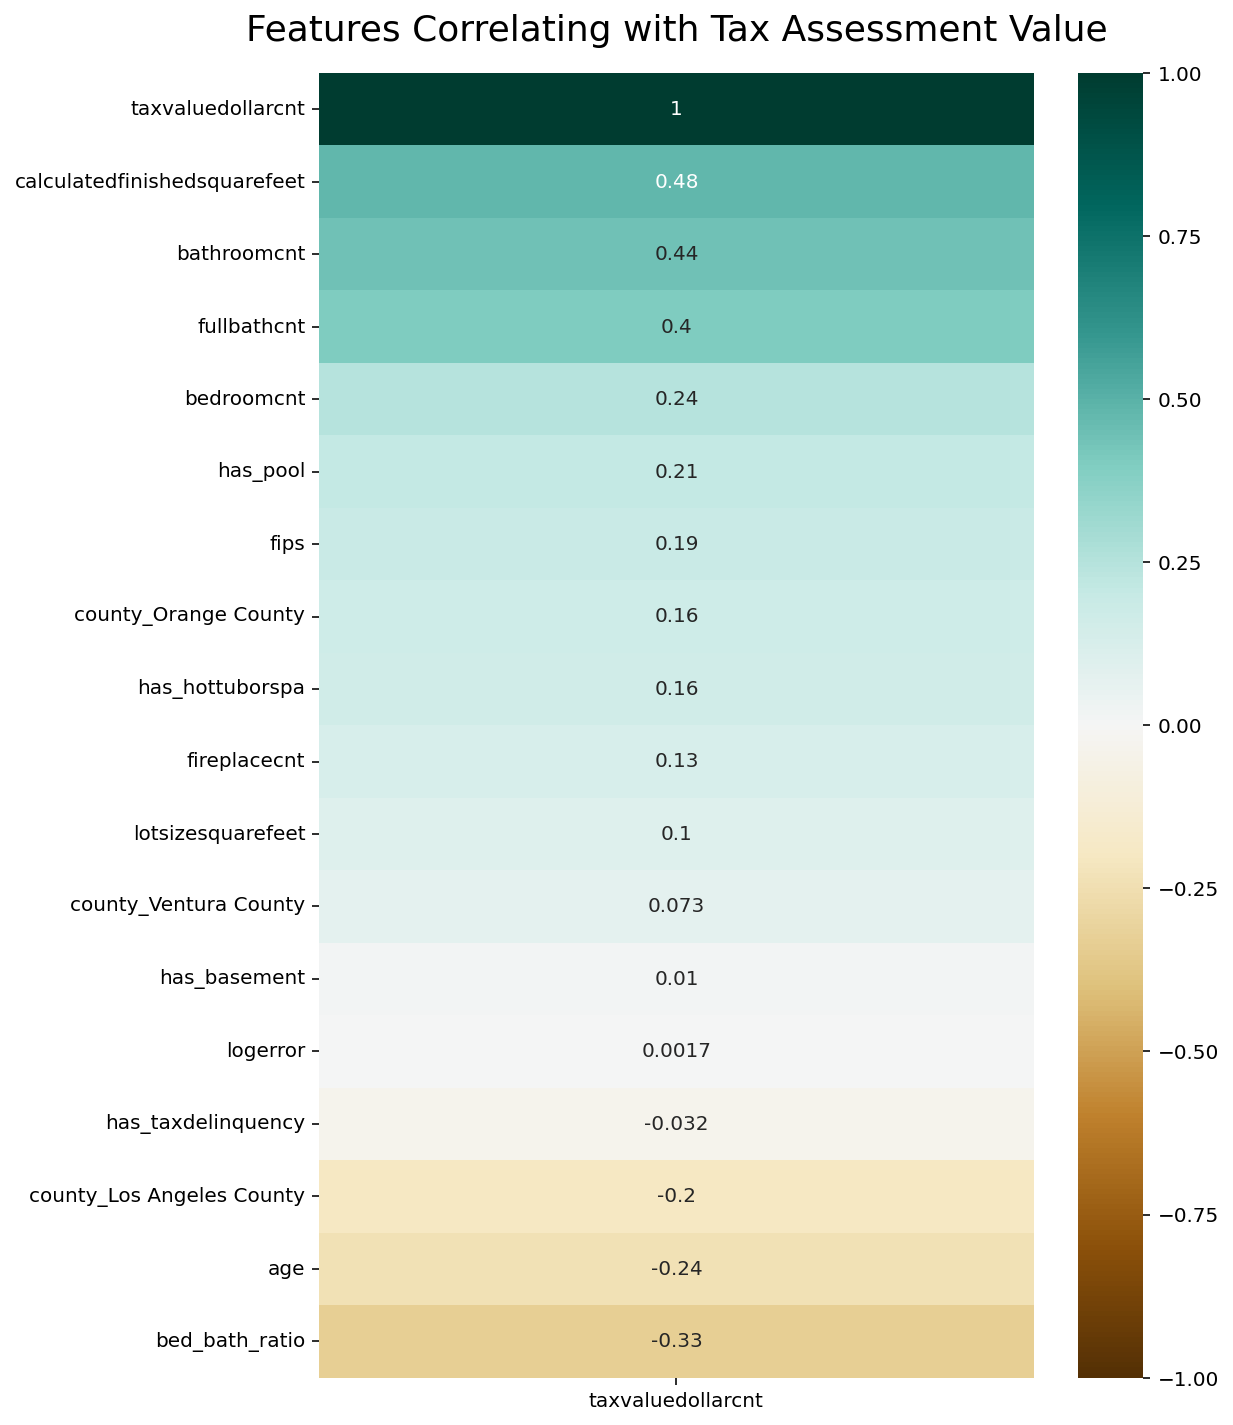

In [8]:
# Show Correlation of features to target
w.fig_00(train)

<div class="alert alert-warning">


## Q1: Does Property Squarefoot impact the Property Tax Assessment Value?
* The ```Property Squarefoot``` has a significant ```relationship``` with the ```Tax Assessment Value```.  


* Continuous (calculatedfinishedsquarefeet) vs Continuous (taxvaluedollarcnt) = **Pearson’s R**.
    *       r: 0.5741420017374894
    * p-value: 0.0


* Two_Tail, Two_Sample
* $H_{0}$: The property Tax Assesed Value **is NOT dependent** on the property squarefoot.  
* $H_{a}$: The property Tax Assesed Value **is dependent** on the property squarefoot.

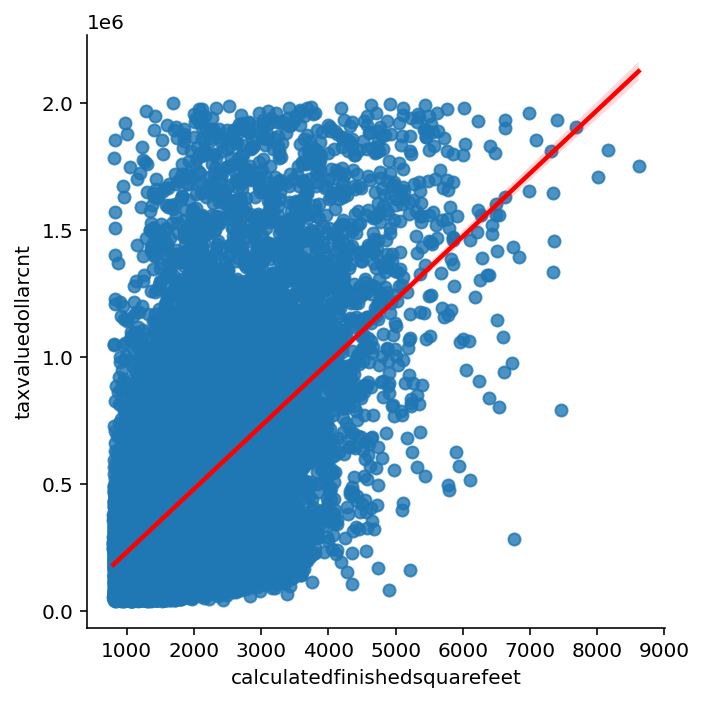

In [9]:
# Show Figure
w.fig_Q1(train)

In [10]:
# Run Statistics Test, Show Decision and Results
w.test_Q1(train)

Decision: Reject the null hypothesis

       r: 0.5741420017374894
   p_val: 0.0


<div class="alert alert-warning">


## Q2: Does the number of Bedrooms impact the Tax Assesment Value?
* The number of ```Bedrooms``` has a significant ```relationship``` with the ```Tax Assessment Value```.  


* Continuous (bedroomcnt) vs Continuous (taxvaluedollarcnt) = **Pearson’s R**.
    *       r: 0.25335560255202555
    * p-value: 0.0


* Two_Tail, Two_Sample
* $H_{0}$: The property Tax Assesed Value **is NOT dependent** on the number of Bedrooms.  
* $H_{a}$: The property Tax Assesed Value **is dependent** on the number of Bedrooms.

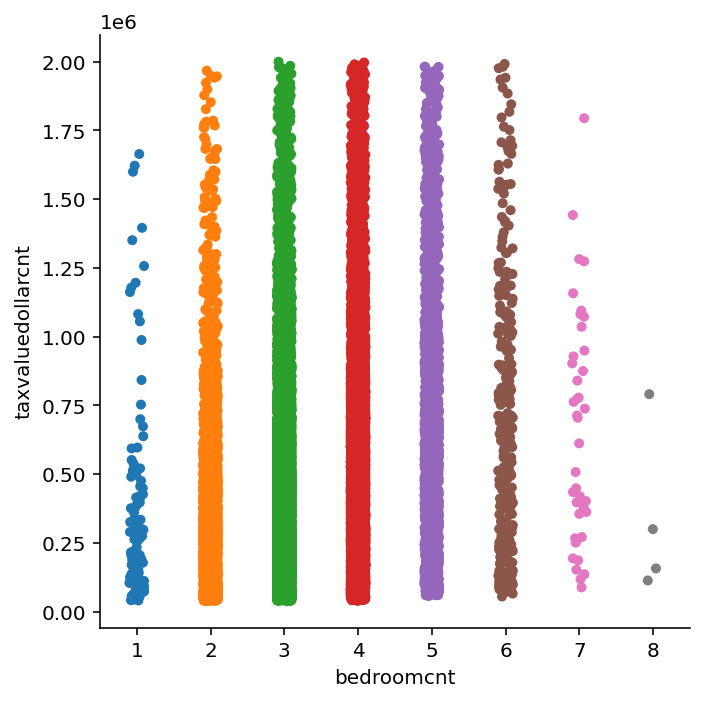

In [11]:
# Show Figure
w.fig_Q2(train)

In [12]:
# Run Statistics Test, Show Decision and Results
w.test_Q2(train)

Decision: Reject the null hypothesis

       r: 0.25335560255202555
   p_val: 0.0


<div class="alert alert-warning">


## Q3: Does the number of Bathrooms impact the Tax Assesment Value?
* The number of ```Bathrooms``` has a significant ```relationship``` with the ```Tax Assessment Value```.  


* Continuous (bathroomcnt) vs Continuous (taxvaluedollarcnt) = **Pearson’s R**.
    *       r: 0.4979516858258451
    * p-value: 0.0


* Two_Tail, Two_Sample
* $H_{0}$: The property Tax Assesed Value **is NOT dependent** on the number of Bathrooms.  
* $H_{a}$: The property Tax Assesed Value **is dependent** on the number of Bathrooms.

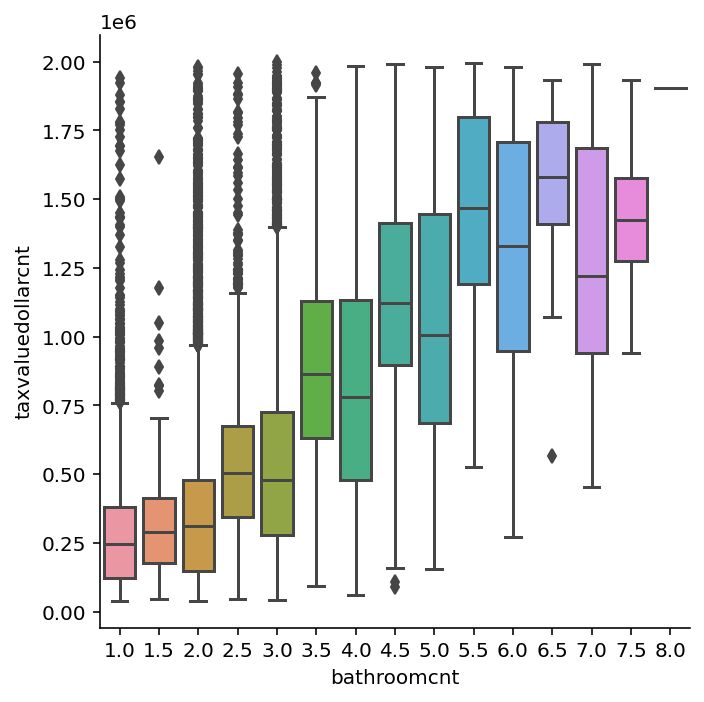

In [13]:
# Show Figure
w.fig_Q3(train)

In [14]:
# Run Statistics Test, Show Decision and Results
w.test_Q3(train)

Decision: Reject the null hypothesis

       r: 0.4979516858258451
   p_val: 0.0


<div class="alert alert-warning">


## Q4: Does the number of Bedrooms impact the the number of Bathrooms?
* The number of ```Bedrooms``` has a significant ```relationship``` with the number of ```Bathrooms```.  


* Continuous (bedroomcnt) vs Continuous (bathroomcnt) = **Pearson’s R**.
    *       r: 0.605089876003165
    * p-value: 0.0


* Two_Tail, Two_Sample
* $H_{0}$: The number of Bathrooms **is NOT dependent** on the number of Bedrooms.  
* $H_{a}$: The number of Bathrooms **is dependent** on the number of Bedrooms.

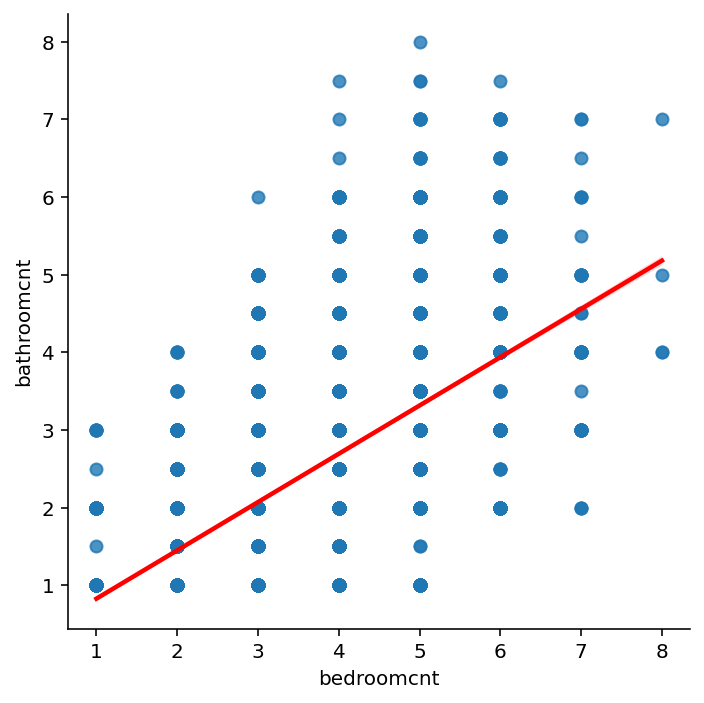

In [15]:
# Show Figure
w.fig_Q4(train)

In [16]:
# Run Statistics Test, Show Decision and Results
w.test_Q4(train)

Decision: Reject the null hypothesis

       r: 0.605089876003165
   p_val: 0.0


# Exploration Summary
<div class="alert alert-info">

## Generally speaking the majority of the features in our DataFrame have a linear Relationship with our taeget but the Features with the most significant relationship were:

  1. Property Squarefeet ```('calculatedfinishedsquarefeet')```
  2. Bathrooms ```('bathroomcny')```
  3. Bedrooms ```('bedroomcnt')```     
    
* We found that Property SQFT has the highest correlation with Tax Assessed Property Value at 48%
* The number of Bathrooms comes in at a close second at 44%
* However, the number of Bedrooms (still the third highest correlation) only scores a 24%

## Takeaways:
* Features available are sufficient to conduct predictions
* We could benefit greatly from additional data and Feature Engineering of Location Data
    
## Features that will be selected for Modeling:
* Our target feature is Tax Assessed Property Value ```('taxvaluedollarcnt')```
* Our selected features are:
    1. Property Squarefeet ```('calculatedfinishedsquarefeet')```
    2. Bathrooms ```('bathroomcny')```
    3. Bedrooms ```('bedroomcnt')```

# Modeling
<div class="alert alert-success">


* Baseline and logerror are our evaluation metrics  
* Our Target feature is the Tax Assessed Property Value (taxvaluedollarcnt) 
    
* **Baseline** This would be simply guessing the Average Tax Assessment Property Value as our prediction every time.

* **Logerror** These are the results of the previous team's predictive model.

* Models will be developed and evaluated using six different regression model types: 
    1. Simple Model
    2. Polynomial Degree 2
    3. Polynomial Only Interaction
    4. Lasso-Lars
    5. Generalized Linear Model
    6. Baseline  
    
    
* Models will be evaluated on train and validate data
* The model that performs the best will ultimately be the one and only model evaluated on our test data 
</div>

<div class="alert alert-warning">


## Multiple Regression + RFE

$$ y = m_1x_1 + m_2x_2 + b $$

$$ y = f(x1, x2, ...) $$

In [17]:
w.mr_rfe(train, validate)

selected top 2 features: Index(['county_Orange County', 'county_Ventura County'], dtype='object')


<div class="alert alert-warning">


## Baseline
* Create a predictions DataFrame
    * include actual
    * include a baseline
    * include logerrors

In [18]:
# create predictions DataFrame to store results of regression models
predictions = w.create_predictions_df(validate)

<div class="alert alert-warning">



## Simple Model

$$ y = mx + b $$

$$y = f(x)$$

In [19]:
w.simple_model(train, validate, predictions)

<div class="alert alert-warning">


## Polynomial Degree 2

In [20]:
w.polynomial_degree(train, validate, predictions)

bedroomcnt                                 -36158.519991
bathroomcnt                                -21317.566226
bedroomcnt bathroomcnt                     -16535.164574
bedroomcnt calculatedfinishedsquarefeet        -1.840363
calculatedfinishedsquarefeet^2                 -0.017293
bathroomcnt calculatedfinishedsquarefeet       17.993813
calculatedfinishedsquarefeet                  282.915370
bedroomcnt^2                                 1526.242288
bathroomcnt^2                               17881.794780
dtype: float64

<div class="alert alert-warning">


## Polynomial Only Interaction

In [21]:
w.polynomial_interaction(train, validate, predictions)

bedroomcnt                                 -41139.133625
bathroomcnt                                -18835.097095
bedroomcnt calculatedfinishedsquarefeet       -24.877100
bathroomcnt calculatedfinishedsquarefeet       17.649795
calculatedfinishedsquarefeet                  282.665351
bedroomcnt bathroomcnt                       9796.352567
dtype: float64

<div class="alert alert-warning">



## Lasso-Lars

Performs intrinsic feature selection and noise reduction to avoid overfitting.

The most important hyperparameter is `alpha`. 
- `alpha` determines the degree of regularization applied to the model. 
- The lowest `alpha` is zero, and this represents no regularization (identical to OLS). 
- There is no limit to `alpha`, but as it rises, it will reach a point where performance no longer changes (often because you've regularized all of your coefficients to zero. 

Generally speaking, the higher the alpha, the lower your risk for overfitting. 

`alpha` = 1.0 is a good place to start.

In [22]:
w.lasso_lars(train, validate, predictions)

bedroomcnt                     -70438.565644
calculatedfinishedsquarefeet      246.952303
bathroomcnt                     52239.541937
dtype: float64

<div class="alert alert-warning">



## Generalized Linear Model

The most flexible regression algorithm, the GLM allows for different distributions, beyond just the Normal Distribution for OLS (and other models based on OLS, like LASSO). We will use the `TweedieRegressor` method to create a GLM using sklearn.

> `sklearn.linear_model.TweedieRegressor(power=0, alpha=1.0)`

* power = 0: Normal Distribution
* power = 1: Poisson Distribution
* power = (1,2): Compound Distribution
* power = 2: Gamma Distribution
* power = 3: Inverse Gaussian Distribution

In [23]:
w.gen_lin_mdl(train, validate, predictions)

bedroomcnt                      0.0
bathroomcnt                     0.0
calculatedfinishedsquarefeet    0.0
dtype: float64

<div class="alert alert-warning">


## Calculate Mean Squared Error (MSE) for every column in the dataframe

In [30]:
%who

HTML	 X_test	 X_train	 X_validate	 calculate_mse	 df	 ee	 feature_cols	 mean_squared_error	 
plt	 predictions	 table_css	 target	 test	 train	 validate	 w	 warnings	 
y_test	 y_train	 y_validate	 


In [29]:
y_predicted

NameError: name 'y_predicted' is not defined

In [32]:
predictions.T

,0,1,2,3,4,5,6,7,8,9,...,9511,9512,9513,9514,9515,9516,9517,9518,9519,9520
actual,1663334,45302,388528,130715,407342,1697655,280429,714220,70781,351274,...,164256,535000,1242641,376667,866000,258220,1637431,1015473,228983,1267425
logerror,0.04901,-0.003143,0.002243,-0.02305,-0.023093,0.043556,0.104934,-0.281834,0.094001,0.034216,...,0.029963,-0.011296,-0.038067,0.027583,0.428248,0.052005,-0.026972,-0.003024,-0.025227,0.020625
baseline,452861.230333,452861.230333,452861.230333,452861.230333,452861.230333,452861.230333,452861.230333,452861.230333,452861.230333,452861.230333,...,452861.230333,452861.230333,452861.230333,452861.230333,452861.230333,452861.230333,452861.230333,452861.230333,452861.230333,452861.230333
simple_lm,983390.124531,294426.378284,303877.8665,325268.076672,517282.521475,621248.891847,453111.890958,221301.7063,324770.629924,492410.184065,...,324273.183176,365809.98665,680693.778256,350886.584204,689150.372975,429731.893793,1634299.19454,836892.057188,300395.739263,1029901.395487
polynomial degree 2,931010.714799,293207.372986,242519.921994,326422.853321,499389.755074,526277.743245,523515.058565,259162.208171,390021.316296,473699.272067,...,325359.686845,369276.154935,628875.441156,353608.804115,756293.738066,419900.599119,1989635.69666,996195.923001,341373.718526,1030911.185736
polynomial only interaction,935951.199147,302881.887929,258440.924719,333055.259481,504174.00976,527231.989931,526742.652775,259068.830534,388345.910179,480563.376102,...,332081.924915,372718.643053,624349.229087,358118.62456,737816.868978,392967.096994,1977004.486996,975954.572693,338747.211524,1030986.554207
lasso_lars,952006.761725,304346.928579,243292.550466,334969.014207,507417.168764,540204.665963,532341.063824,249941.975071,404913.675244,482721.938419,...,333981.204993,375222.239669,643545.061163,360405.101462,730300.752386,386449.439719,1754999.565667,947428.986279,328472.807568,1024306.613438
glm,449783.851861,449783.851861,449783.851861,449783.851861,449783.851861,449783.851861,449783.851861,449783.851861,449783.851861,449783.851861,...,449783.851861,449783.851861,449783.851861,449783.851861,449783.851861,449783.851861,449783.851861,449783.851861,449783.851861,449783.851861


In [35]:
w.calculate_mse(predictions, y_predicted)

NameError: name 'y_predicted' is not defined

In [34]:
from importlib import reload

# This code refreshes all of my helper files (w/o the need to stop the kernel)
reload(w)

<module 'QMCBT_wrangle' from '/Users/qmcbt/codeup-data-science/project-2_zillow/QMCBT_wrangle.py'>

In [24]:
def calculate_mse(y_predicted):
    return mean_squared_error(predictions.actual, y_predicted)

predictions.apply(calculate_mse).sort_values()

actual                         0.000000e+00
polynomial degree 2            8.190023e+10
polynomial only interaction    8.207193e+10
lasso_lars                     8.228066e+10
simple_lm                      8.479923e+10
baseline                       1.251512e+11
glm                            1.251606e+11
logerror                       3.302344e+11
dtype: float64

In [43]:
 mean_squared_error(predictions.actual, predictions.logerror)

330234435721.663

## Comparing Models
<div class="alert alert-info">


* Decision Tree, Random Forest, and KNN models all performed above the Baseline of 73%
* The KNN model performed slightly better on train data than it did on the validate data which may be a sign of overfit.
* Because the results of the Decision Tree, Random Forest, and KNN models were all very similar and above Baseline, we could proceed to test with any of these models.


* ```Random Forest``` however, is the best model that retained high performance across both train and validate data and will likely perform well above Baseline on the Test data.
</div>

<div class="alert alert-success">

# Evaluate on Test: Best Model (```2nd Degree Polynomial```)
</div>

# re-create our polynomial model
X_train = train[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']]
y_train = train.taxvaluedollarcnt

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
poly.fit(X_train)
X_train_poly = pd.DataFrame(
    poly.transform(X_train),
    columns=poly.get_feature_names(X_train.columns),
    index=train.index,
)

lm = LinearRegression()
lm.fit(X_train_poly, y_train)

# any transformations applied to your training data must be applied to the test as well

X_test = test[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']]
X_test_poly = poly.transform(X_test)

test_predictions = lm.predict(X_test_poly)
test_actual = test.taxvaluedollarcnt

mean_squared_error(test_actual, test_predictions)

In [25]:
# Run validation Code to show Performance Accuracy

In [26]:
# Place Test Code Here

In [27]:
# Run Code to display Graph Here

<div class="alert alert-info">

# Conclusions
* We were asked to find a model that performs better than the logerror model currently on file
    * Every model we ran would have outperformed the current logerror model including baseline
    * The ```2nd Degree Polynomial``` model is the best performing model,  
  it has outperformed all other models that we evaluated,  
  including both the current logerror model and the Baseline.

    
* We were asked to include a crossreference of the fips to the corresponding location  
    * That information was pulled in using a master .csv file
    * It is now hard coded into the DataFrame used for this project
    * It is also listed in the Dictionary and below
    
|fips|State|County|
|:--:|:---:|:-----|
|6037|CA   |Los Angeles County|    
|6059|CA   |Orange County| 
|6111|CA   |Ventura County|    

</div>

<div class="alert alert-info">

## Recommendations
* Consider implementing incentives for increased Tech Support
</div>

<div class="alert alert-warning">

## Next Steps
* During our Modeling, a run of ```Multiple Regression + RFE``` revealed that the two top features were the Orange County and Ventura County categorical features.
* Although this did not align with our correlation tests and we did not pursue it
* It proves that these features have significance
    
### Given more time...
* We could spend some time converting Location Data into something useful for Machine Learning
* We could scrape Zip Code Income, Population and Demographics to include in the DataFrame
* [Name Census](https://namecensus.com/zip-codes/california/orange-county/#:~:text=Orange%20County%20makes%20up%20approximately,information%20for%20each%20zip%20code) keeps all of this data
* Here is an example: <a href="https://namecensus.com/demographics/california/90620/">90620 Zip Code Income, Population and Demographics</a></div>
REF: 90620 Zip Code Income, Population and Demographics. NameCensus.com. Retrieved from https://namecensus.com/demographics/california/90620/.


```quit()```... |